<a href="https://colab.research.google.com/github/JSEFERINO/JSEFERINO/blob/main/DOEJH0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño Completamente Al Azar**


# **Ejemplo**

### Supóngase que se un estudio quiere comprobar si existe una diferencia significativa entre el % de bateos exitosos de los jugadores de béisbol dependiendo de la posición en la que juegan. En el caso de que exista, se quiere saber qué posiciones difieren del resto.

## **Librerías**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot

## **Datos**


La siguiente tabla contiene una muestra de jugadores de la liga seleccionados aleatoriamente.

- C: Cátcher, receptor.
- LF: Leftfielder, jardinero izquierdo.
- CF: Centerfield, jardinero central.
- OF: Outfielder, jardinero, guardabosque.
- DH / BD: Bateador designado.




In [3]:
posicion = ["OF", "IF", "IF", "OF", "IF", "IF", "OF", "OF", "IF", "IF", "OF",
            "OF", "IF", "OF", "IF", "IF", "IF", "OF", "IF", "OF", "IF", "OF",
            "IF", "OF", "IF", "DH", "IF", "IF", "IF", "OF", "IF", "IF", "IF",
            "IF", "OF", "IF", "OF", "IF", "IF", "IF", "IF", "OF", "OF", "IF",
            "OF", "OF", "IF", "IF", "OF", "OF", "IF", "OF", "OF", "OF", "IF",
            "DH", "OF", "OF", "OF", "IF", "IF", "IF", "IF", "OF", "IF", "IF",
            "OF", "IF", "IF", "IF", "OF", "IF", "IF", "OF", "IF", "IF", "IF",
            "IF", "IF", "IF", "OF", "DH", "OF", "OF", "IF", "IF", "IF", "OF",
            "IF", "OF", "IF", "IF", "IF", "IF", "OF", "OF", "OF", "DH", "OF",
            "IF", "IF", "OF", "OF", "C", "IF", "OF", "OF", "IF", "OF", "IF",
            "IF", "IF", "OF", "C", "OF", "IF", "C", "OF", "IF", "DH", "C", "OF",
            "OF", "IF", "C", "IF", "IF", "IF", "IF", "IF", "IF", "OF", "C", "IF",
            "OF", "OF", "IF", "OF", "IF", "OF", "DH", "C", "IF", "OF", "IF",
            "IF", "OF", "IF", "OF", "IF", "C", "IF", "IF", "OF", "IF", "IF",
            "IF", "OF", "OF", "OF", "IF", "IF", "C", "IF", "C", "C", "OF", "OF",
            "OF", "IF", "OF", "IF", "C", "DH", "DH", "C", "OF", "IF", "OF", "IF",
            "IF", "IF", "C", "IF", "OF", "DH", "IF", "IF", "IF", "OF", "OF", "C",
            "OF", "OF", "IF", "IF", "OF", "OF", "OF", "OF", "OF", "OF", "IF",
            "IF", "DH", "OF", "IF", "IF", "OF", "IF", "IF", "IF", "IF", "OF",
            "IF", "C", "IF", "IF", "C", "IF", "OF", "IF", "DH", "C", "OF", "C",
            "IF", "IF", "OF", "C", "IF", "IF", "IF", "C", "C", "C", "OF", "OF",
            "IF", "IF", "IF", "IF", "OF", "OF", "C", "IF", "IF", "OF", "C", "OF",
            "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "C",
            "IF", "DH", "IF", "C", "DH", "C", "IF", "C", "OF", "C", "C", "IF",
            "OF", "IF", "IF", "IF", "IF", "IF", "IF", "IF", "IF", "OF", "OF",
            "OF", "IF", "OF", "OF", "IF", "IF", "IF", "OF", "C", "IF", "IF",
            "IF", "IF", "OF", "OF", "IF", "OF", "IF", "OF", "OF", "OF", "IF",
            "OF", "OF", "IF", "OF", "IF", "C", "IF", "IF", "C", "DH", "OF", "IF",
            "C", "C", "IF", "C", "IF", "OF", "C", "C", "OF"]

bateo = [0.359, 0.34, 0.33, 0.341, 0.366, 0.333, 0.37, 0.331, 0.381, 0.332,
         0.365, 0.345, 0.313, 0.325, 0.327, 0.337, 0.336, 0.291, 0.34, 0.31,
         0.365, 0.356, 0.35, 0.39, 0.388, 0.345, 0.27, 0.306, 0.393, 0.331,
         0.365, 0.369, 0.342, 0.329, 0.376, 0.414, 0.327, 0.354, 0.321, 0.37,
         0.313, 0.341, 0.325, 0.312, 0.346, 0.34, 0.401, 0.372, 0.352, 0.354,
         0.341, 0.365, 0.333, 0.378, 0.385, 0.287, 0.303, 0.334, 0.359, 0.352,
         0.321, 0.323, 0.302, 0.349, 0.32, 0.356, 0.34, 0.393, 0.288, 0.339,
         0.388, 0.283, 0.311, 0.401, 0.353, 0.42, 0.393, 0.347, 0.424, 0.378,
         0.346, 0.355, 0.322, 0.341, 0.306, 0.329, 0.271, 0.32, 0.308, 0.322,
         0.388, 0.351, 0.341, 0.31, 0.393, 0.411, 0.323, 0.37, 0.364, 0.321,
         0.351, 0.329, 0.327, 0.402, 0.32, 0.353, 0.319, 0.319, 0.343, 0.288,
         0.32, 0.338, 0.322, 0.303, 0.356, 0.303, 0.351, 0.325, 0.325, 0.361,
         0.375, 0.341, 0.383, 0.328, 0.3, 0.277, 0.359, 0.358, 0.381, 0.324,
         0.293, 0.324, 0.329, 0.294, 0.32, 0.361, 0.347, 0.317, 0.316, 0.342,
         0.368, 0.319, 0.317, 0.302, 0.321, 0.336, 0.347, 0.279, 0.309, 0.358,
         0.318, 0.342, 0.299, 0.332, 0.349, 0.387, 0.335, 0.358, 0.312, 0.307,
         0.28, 0.344, 0.314, 0.24, 0.331, 0.357, 0.346, 0.351, 0.293, 0.308,
         0.374, 0.362, 0.294, 0.314, 0.374, 0.315, 0.324, 0.382, 0.353, 0.305,
         0.338, 0.366, 0.357, 0.326, 0.332, 0.323, 0.306, 0.31, 0.31, 0.333,
         0.34, 0.4, 0.389, 0.308, 0.411, 0.278, 0.326, 0.335, 0.316, 0.371,
         0.314, 0.384, 0.379, 0.32, 0.395, 0.347, 0.307, 0.326, 0.316, 0.341,
         0.308, 0.327, 0.337, 0.36, 0.32, 0.372, 0.306, 0.305, 0.347, 0.281,
         0.281, 0.296, 0.306, 0.343, 0.378, 0.393, 0.337, 0.327, 0.336, 0.32,
         0.381, 0.306, 0.358, 0.311, 0.284, 0.364, 0.315, 0.342, 0.367, 0.307,
         0.351, 0.372, 0.304, 0.296, 0.332, 0.312, 0.437, 0.295, 0.316, 0.298,
         0.302, 0.342, 0.364, 0.304, 0.295, 0.305, 0.359, 0.335, 0.338, 0.341,
         0.3, 0.378, 0.412, 0.273, 0.308, 0.309, 0.263, 0.291, 0.359, 0.352,
         0.262, 0.274, 0.334, 0.343, 0.267, 0.321, 0.3, 0.327, 0.313, 0.316,
         0.337, 0.268, 0.342, 0.292, 0.39, 0.332, 0.315, 0.298, 0.298, 0.331,
         0.361, 0.272, 0.287, 0.34, 0.317, 0.327, 0.354, 0.317, 0.311, 0.174,
         0.302, 0.302, 0.291, 0.29, 0.268, 0.352, 0.341, 0.265, 0.307, 0.36,
         0.305, 0.254, 0.279, 0.321, 0.305, 0.35, 0.308, 0.326, 0.219, 0.23,
         0.322, 0.405, 0.321, 0.291, 0.312, 0.357, 0.324]

         
datos = pd.DataFrame({'posicion': posicion, 'bateo': bateo})
datos.head()

,posicion,bateo
0,OF,0.359
1,IF,0.340
2,IF,0.330
3,OF,0.341
4,IF,0.366


## **Número de grupos, observaciones por grupo y distribución de las observaciones**


Se identifica el número de grupos y cantidad de observaciones por grupo para determinar si es un modelo equilibrado. También se calculan la media y desviación típica de caga grupo.

In [4]:
# Número de observaciones por grupo
# ==============================================================================
datos.groupby('posicion').size()

posicion
C      39
DH     14
IF    154
OF    120
dtype: int64

In [5]:
# Média y desviación típica por grupo
# ==============================================================================
datos.groupby('posicion').agg(['mean', 'std'])

bateo          
              mean       std
posicion                    
C         0.322615  0.045132
DH        0.347786  0.036037
IF        0.331526  0.037095
OF        0.334250  0.029444

Dado que el número de observaciones por grupo no es constante, se trata de un modelo no equilibrado. Es importante tenerlo en cuenta cuando se comprueben las condiciones de normalidad y homocedasticidad.

## Análisis gráfico


Dos de las representación más útiles antes de realizar un ANOVA son los gráficos Box-Plot y los Violin-Plot.

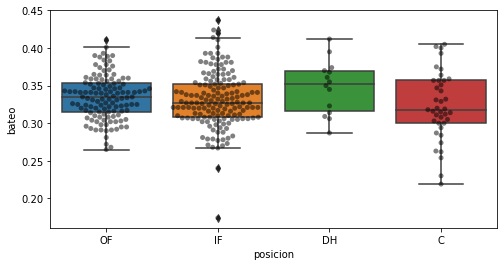

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="posicion", y="bateo", data=datos, ax=ax)
sns.swarmplot(x="posicion", y="bateo", data=datos, color='black', alpha = 0.5, ax=ax);

Este tipo de representación permite identificar de forma preliminar si existen asimetrías, datos atípicos o diferencia de varianzas. En este caso, los 4 grupos parecen seguir una distribución simétrica. En el nivel IF se detectan algunos valores extremos que habrá que estudiar con detalle por si fuese necesario eliminarlos. El tamaño de las cajas es similar para todos los niveles por lo que no hay indicios de falta de homocedasticidad.


## Verificar condiciones para un ANOVA


### Independencia

Los grupos (variable categórica) y jugadores dentro de cada grupo son independientes entre ellos ya que se ha hecho un muestreo aleatorio de jugadores de toda la liga (no solo de un mismo equipo).


#### Distribución normal de las observaciones

La variable cuantitativa debe de distribuirse de forma normal en cada uno de los grupos. El estudio de normalidad puede hacerse de forma gráfica (qqplot) o con test de hipótesis.

In [ ]:
!pip install pingouin

In [9]:
import pingouin as pg

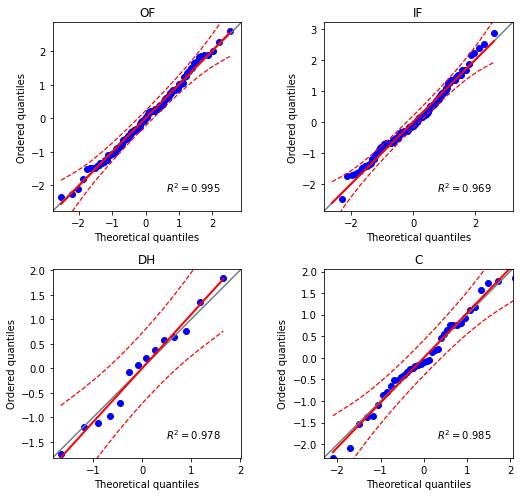

In [10]:
# Gráficos qqplot
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(8, 7))
pg.qqplot(datos.loc[datos.posicion=='OF', 'bateo'], dist='norm', ax=axs[0,0])
axs[0,0].set_title('OF')
pg.qqplot(datos.loc[datos.posicion=='IF', 'bateo'], dist='norm', ax=axs[0,1])
axs[0,1].set_title('IF')
pg.qqplot(datos.loc[datos.posicion=='DH', 'bateo'], dist='norm', ax=axs[1,0])
axs[1,0].set_title('DH')
pg.qqplot(datos.loc[datos.posicion=='C', 'bateo'], dist='norm', ax=axs[1,1])
axs[1,1].set_title('C')
plt.tight_layout()


In [11]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=datos, dv='bateo', group='posicion')

,W,pval,normal
posicion,,,
OF,0.993360,0.842232,True
IF,0.974848,0.006405,False
DH,0.972156,0.904092,True
C,0.980154,0.709167,True


Ni el análisis gráfico ni los test de hipótesis no muestran evidencias de falta de normalidad.

## Varianza constante entre grupos (homocedasticidad)

Dado que hay un grupo IF que se encuentra en el límite para aceptar que se distribuye de forma normal, el test de Levene más adecuado que el de Bartlett.

In [12]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=datos, dv='bateo', group='posicion', method='levene')

,W,pval,equal_var
levene,2.605659,0.051799,True


### ANOVA¶

In [ ]:
# Test ANOVA de una vía (One-way ANOVA)
# ==============================================================================
pg.anova(data=datos, dv='bateo', between='posicion', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,posicion,0.007557,3,0.002519,1.994349,0.114693,0.018186
1,Within,0.407984,323,0.001263,NaN,NaN,NaN


Un p-value es superior a 0.1 es una evidencia muy dévil en contra de la hipótesis núla de que todos los grupos tienen la misma media. El valor de eta cuadrado ( η2 ) es de 0.018, lo ue puede considerarse como un tamaño de efecto pequeño.

## Comparaciones múltiples post-hoc


En este caso, el ANOVA no ha resultado significativo, por lo que no tiene sentido realizar comparaciones dos a dos. Sin embargo, con fines didácticos, se muestra como se obtienen los test TukeyHSD.

In [ ]:
# Post-hoc Tukey test
# ==============================================================================
pg.pairwise_tukey(data=datos, dv='bateo', between='posicion').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,C,DH,0.323,0.348,-0.025,0.011,-2.273,0.106,-0.698
1,C,IF,0.323,0.332,-0.009,0.006,-1.399,0.501,-0.250
2,C,OF,0.323,0.334,-0.012,0.007,-1.776,0.287,-0.326
3,DH,IF,0.348,0.332,0.016,0.010,1.639,0.358,0.455
4,DH,OF,0.348,0.334,0.014,0.010,1.349,0.533,0.379
5,IF,OF,0.332,0.334,-0.003,0.004,-0.629,0.923,-0.076


Como era de esperar, no se encuentra diferencia significativa entre ningún par de medias.